In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pit
import seaborn as sns
from sklearn.cluster import DBSCAN

In [43]:
act = pd.read_csv('OTg6QzA_activities.csv')
act.shape

(66281, 4)

In [44]:
act['p_timestamp'] = act['timestamp'].shift(1)
act['p_x'] = act['X'].shift(1)
act['p_y'] = act['Y'].shift(1)
act['p_z'] = act['Z'].shift(1)
act.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z
0,2022-01-01 00:01:40.363,33,76,56,None,NaN,NaN,NaN
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0


In [45]:
cleaned = act.dropna()
cleaned.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0


In [46]:
def calc_dist(df):
    x_d = df['X'] - df ['p_x']
    y_d = df['Y'] - df ['p_y']
    z_d = df['Z'] - df ['p_z']
    return np.sqrt(x_d**2 + y_d**2 + z_d**2)

cleaned.loc[:,'dist'] = cleaned.loc[:,['X','p_x','Y','p_y','Z','p_z']].apply(calc_dist, axis=1)
cleaned.head(5)

C:\Users\302-15\AppData\Local\Temp\ipykernel_15544\1459841638.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned.loc[:,'dist'] = cleaned.loc[:,['X','p_x','Y','p_y','Z','p_z']].apply(calc_dist, axis=1)


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111


In [47]:
from datetime import datetime

def calc_timediff(df):
  d1 = datetime.strptime(df['timestamp'], "%Y-%m-%d %H:%M:%S.%f")
  d2 = datetime.strptime(df['p_timestamp'], "%Y-%m-%d %H:%M:%S.%f")
  return (d1 - d2).total_seconds()



cleaned['d_time'] = cleaned[["timestamp","p_timestamp"]].apply(calc_timediff, axis=1)
cleaned.head(5)

C:\Users\302-15\AppData\Local\Temp\ipykernel_15544\1538429941.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['d_time'] = cleaned[["timestamp","p_timestamp"]].apply(calc_timediff, axis=1)


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901


In [48]:
cleaned.loc[:,['timestamp','p_timestamp']]

,timestamp,p_timestamp
1,2022-01-01 00:01:42.961,2022-01-01 00:01:40.363
2,2022-01-01 00:01:45.562,2022-01-01 00:01:42.961
3,2022-01-01 00:01:48.163,2022-01-01 00:01:45.562
4,2022-01-01 00:02:08.864,2022-01-01 00:01:48.163
5,2022-01-01 00:02:21.765,2022-01-01 00:02:08.864
...,...,...
66276,2022-01-31 23:28:00.481,2022-01-31 23:27:55.381
66277,2022-01-31 23:28:41.683,2022-01-31 23:28:00.481
66278,2022-01-31 23:28:49.383,2022-01-31 23:28:41.683
66279,2022-01-31 23:32:36.426,2022-01-31 23:28:49.383


In [49]:
def calc_act(df):
    if df['d_time'] != 0:
        return np.abs(df['dist'] / df['d_time'])
    else:
        return 0
    
cleaned['calc_act'] = cleaned[["dist","d_time"]].apply(calc_act, axis=1)

cleaned.head(5)

C:\Users\302-15\AppData\Local\Temp\ipykernel_15544\390829812.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['calc_act'] = cleaned[["dist","d_time"]].apply(calc_act, axis=1)


,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time,calc_act
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598,4.251486
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601,4.953517
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601,9.146772
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701,1.134954
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901,0.980475


<Axes: title={'center': 'calculation of activity'}, xlabel='time series', ylabel='activity [cm/sec]'>

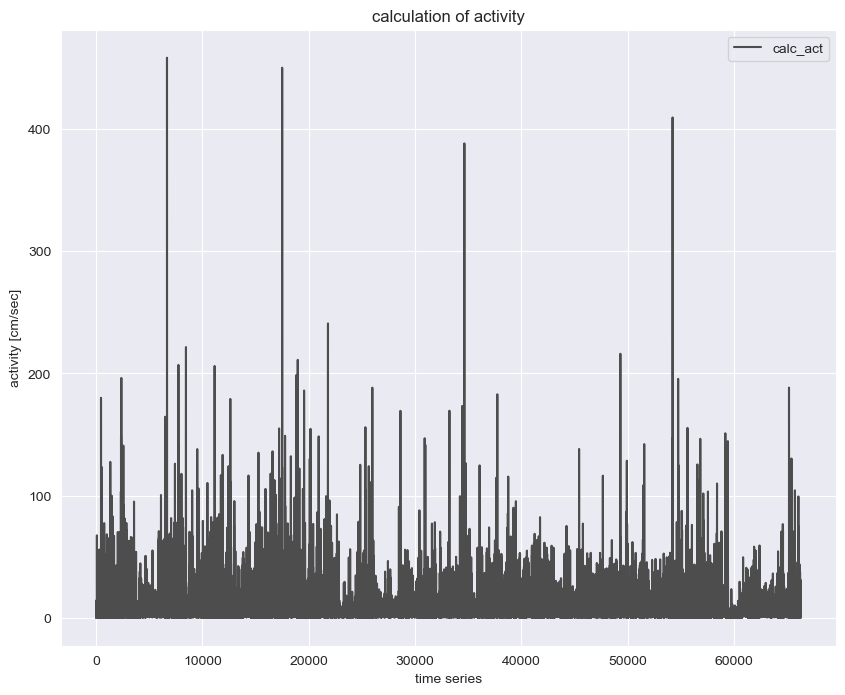

In [50]:
pit.rcParams['figure.figsize'] = [10,8]

cleaned.plot(y="calc_act", color="0.3", title="calculation of activity",ylabel='activity [cm/sec]',xlabel='time series')

In [51]:
import statsmodels.api as sm

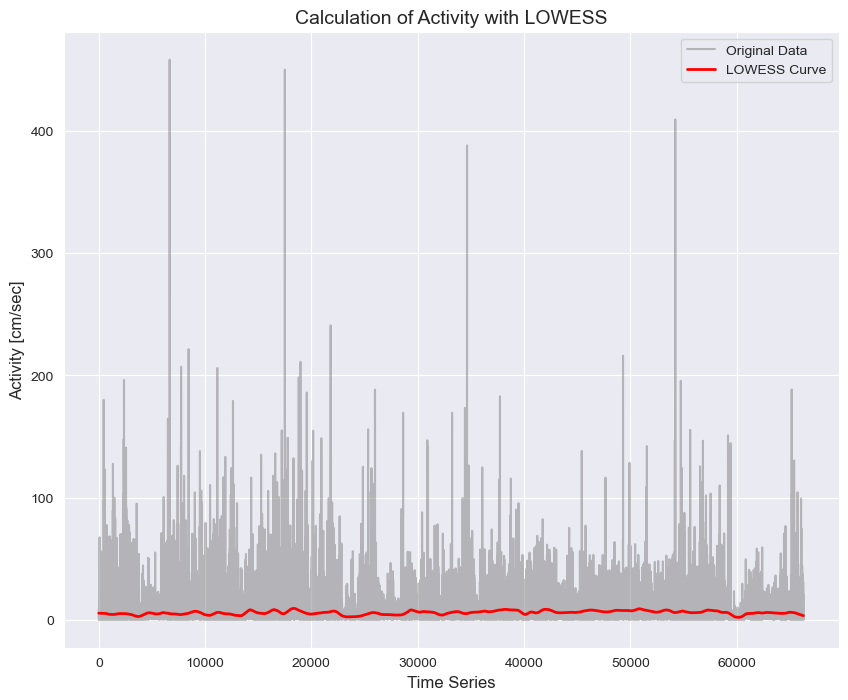

In [52]:
lowess_result = sm.nonparametric.lowess(cleaned["calc_act"], cleaned.index, frac=0.02)

# 그래프 그리기
pit.figure(figsize=(10,8))

# 원본 데이터
pit.plot(cleaned.index, cleaned["calc_act"], color="gray", alpha=0.5, label="Original Data")

# LOWESS 곡선 추가
pit.plot(lowess_result[:, 0], lowess_result[:, 1], color="red", linewidth=2, label="LOWESS Curve")
# 그래프 설정
pit.title("Calculation of Activity with LOWESS", fontsize=14)
pit.xlabel("Time Series", fontsize=12)
pit.ylabel("Activity [cm/sec]", fontsize=12)
pit.legend()
pit.grid(True)

pit.show()

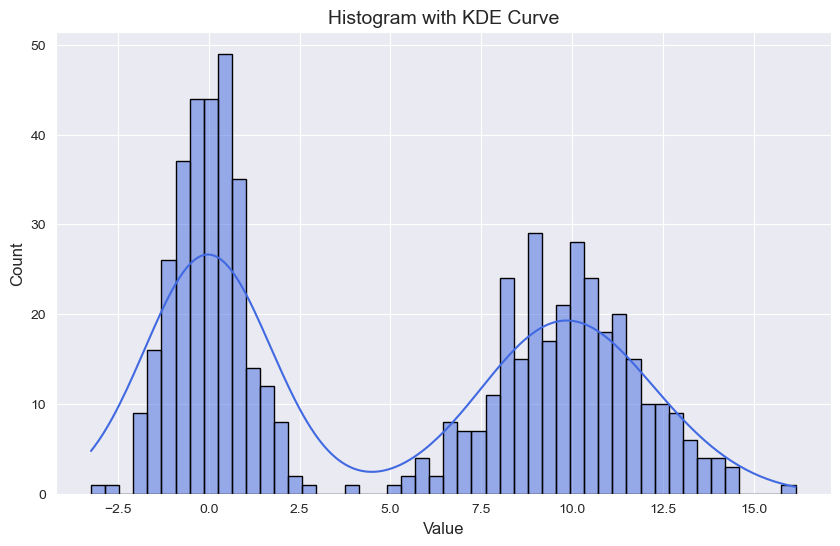

In [53]:
np.random.seed(42)
data1 = np.random.normal(loc=0, scale=1, size=300)   # 평균 0, 표준편차 1
data2 = np.random.normal(loc=10, scale=2, size=300)  # 평균 10, 표준편차 2
data = np.concatenate([data1, data2])  # 두 개의 분포 합침

# Seaborn 스타일 설정
sns.set_style("darkgrid")

# 그래프 그리기
pit.figure(figsize=(10,6))
sns.histplot(data, bins=50, kde=True, color="royalblue", edgecolor="black")

# 그래프 설정
pit.xlabel("Value", fontsize=12)
pit.ylabel("Count", fontsize=12)
pit.title("Histogram with KDE Curve", fontsize=14)

pit.show()

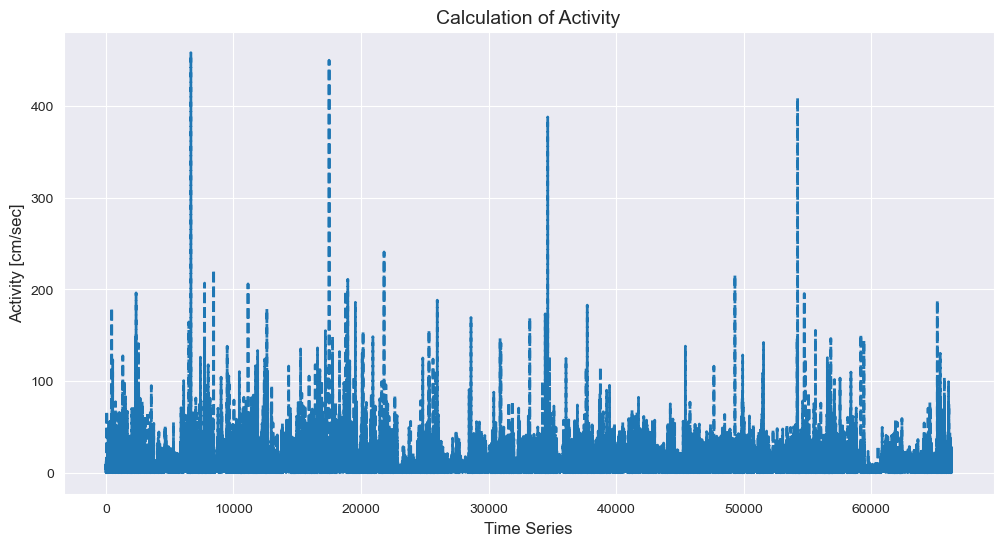

In [54]:
pit.figure(figsize=(12,6))

# 데이터 플로팅
pit.plot(cleaned.index, cleaned["calc_act"], color="#1f77b4", linestyle="--", linewidth=2)

# 제목 및 축 레이블 설정
pit.title("Calculation of Activity", fontsize=14)
pit.xlabel("Time Series", fontsize=12)
pit.ylabel("Activity [cm/sec]", fontsize=12)

# 그리드 추가
pit.grid(True)

# 그래프 표시
pit.show()

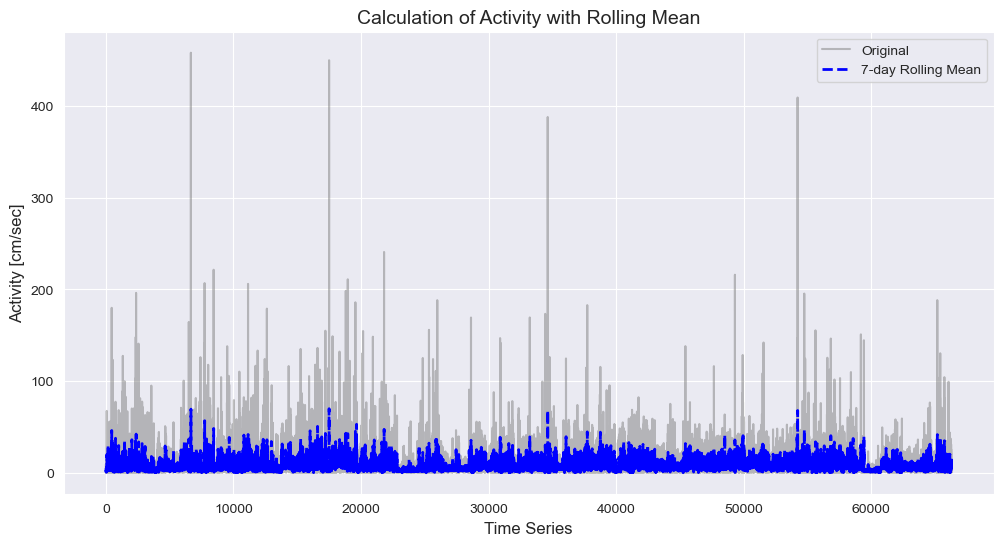

In [55]:
pit.figure(figsize=(12,6))
pit.plot(cleaned.index, cleaned["calc_act"], color="gray", alpha=0.5, label="Original")

# 이동 평균 (7일)
rolling_mean = cleaned["calc_act"].rolling(window=7).mean()
pit.plot(cleaned.index, rolling_mean, color="blue", linestyle="--", linewidth=2, label="7-day Rolling Mean")

pit.title("Calculation of Activity with Rolling Mean", fontsize=14)
pit.xlabel("Time Series", fontsize=12)
pit.ylabel("Activity [cm/sec]", fontsize=12)
pit.legend()
pit.grid(True)

pit.show()

In [56]:
len(cleaned[cleaned['calc_act'] < 50.0])/len(cleaned)

0.9916113458056729

In [57]:
cleaned.dtypes

timestamp       object
X                int64
Y                int64
Z                int64
p_timestamp     object
p_x            float64
p_y            float64
p_z            float64
dist           float64
d_time         float64
calc_act       float64
dtype: object

In [58]:
cleaned2 = cleaned.copy()

cleaned2 = cleaned2[['timestamp','calc_act']]

cleaned2['timestamp'] = cleaned2['timestamp'].astype('datetime64[ns]')

cleaned2

,timestamp,calc_act
1,2022-01-01 00:01:42.961,4.251486
2,2022-01-01 00:01:45.562,4.953517
3,2022-01-01 00:01:48.163,9.146772
4,2022-01-01 00:02:08.864,1.134954
5,2022-01-01 00:02:21.765,0.980475
...,...,...
66276,2022-01-31 23:28:00.481,3.167744
66277,2022-01-31 23:28:41.683,0.084076
66278,2022-01-31 23:28:49.383,1.055070
66279,2022-01-31 23:32:36.426,0.030831


In [59]:
cleaned2.dtypes

timestamp    datetime64[ns]
calc_act            float64
dtype: object

In [60]:
cleaned2 = cleaned2.set_index('timestamp')
cleaned2.dtypes

calc_act    float64
dtype: object

In [61]:
cleaned2

,calc_act
timestamp,
2022-01-01 00:01:42.961,4.251486
2022-01-01 00:01:45.562,4.953517
2022-01-01 00:01:48.163,9.146772
2022-01-01 00:02:08.864,1.134954
2022-01-01 00:02:21.765,0.980475
...,...
2022-01-31 23:28:00.481,3.167744
2022-01-31 23:28:41.683,0.084076
2022-01-31 23:28:49.383,1.055070


In [62]:
tenmin = cleaned2.resample('10min')
result = tenmin['calc_act'].agg(['mean','min','max'])
result

,mean,min,max
timestamp,,,
2022-01-01 00:00:00,2.359774,0.205775,9.146772
2022-01-01 00:10:00,3.804910,0.011198,12.985407
2022-01-01 00:20:00,1.204413,0.176624,3.200697
2022-01-01 00:30:00,0.065608,0.065608,0.065608
2022-01-01 00:40:00,NaN,NaN,NaN
...,...,...,...
2022-01-31 22:50:00,5.271830,0.174116,16.061886
2022-01-31 23:00:00,NaN,NaN,NaN
2022-01-31 23:10:00,11.671627,0.090195,31.025631


<Axes: title={'center': 'resample by10-minute'}, xlabel='timestamp', ylabel='Average activitv [cm/sec]'>

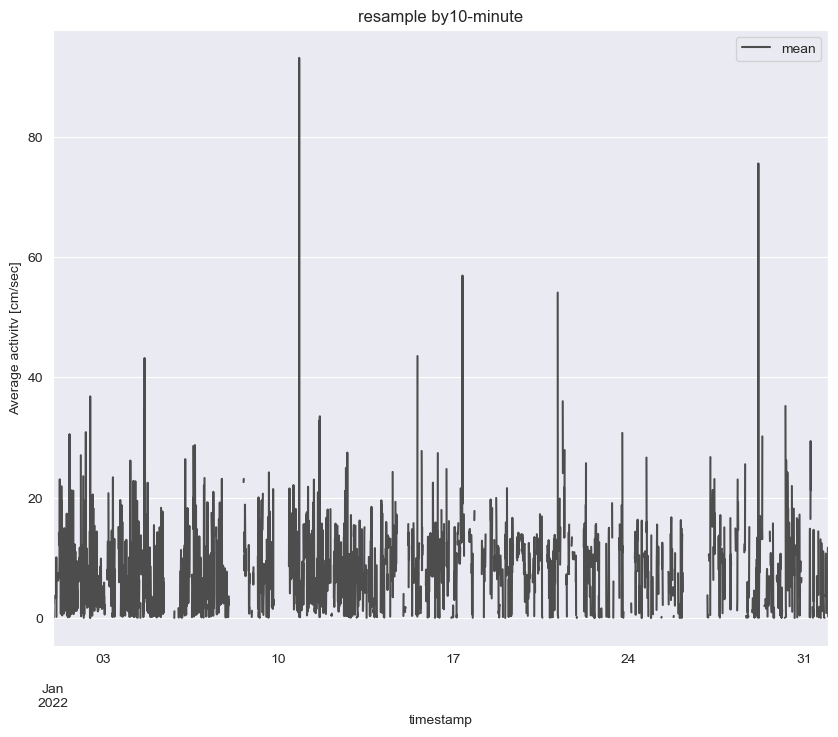

In [63]:
result.plot(y='mean', color='0.3', title='resample by10-minute',ylabel='Average activitv [cm/sec]',xlabel='timestamp')

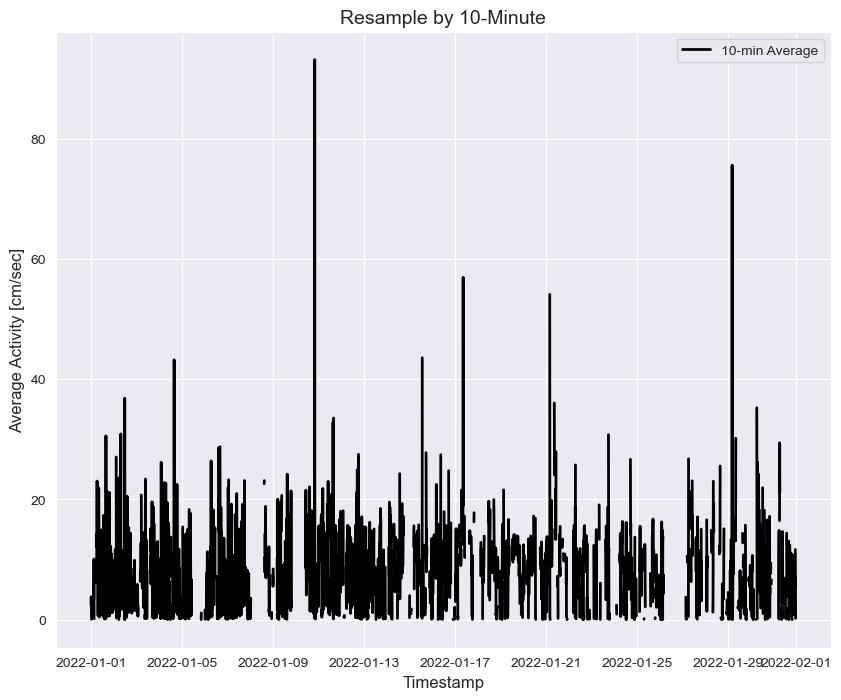

In [64]:
pit.plot(result.index, result["mean"], color="black", linestyle="-", linewidth=2, label="10-min Average")

pit.title("Resample by 10-Minute", fontsize=14)
pit.xlabel("Timestamp", fontsize=12)
pit.ylabel("Average Activity [cm/sec]", fontsize=12)
pit.legend()
pit.grid(True)

pit.show()

In [65]:
pit.figure()



<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

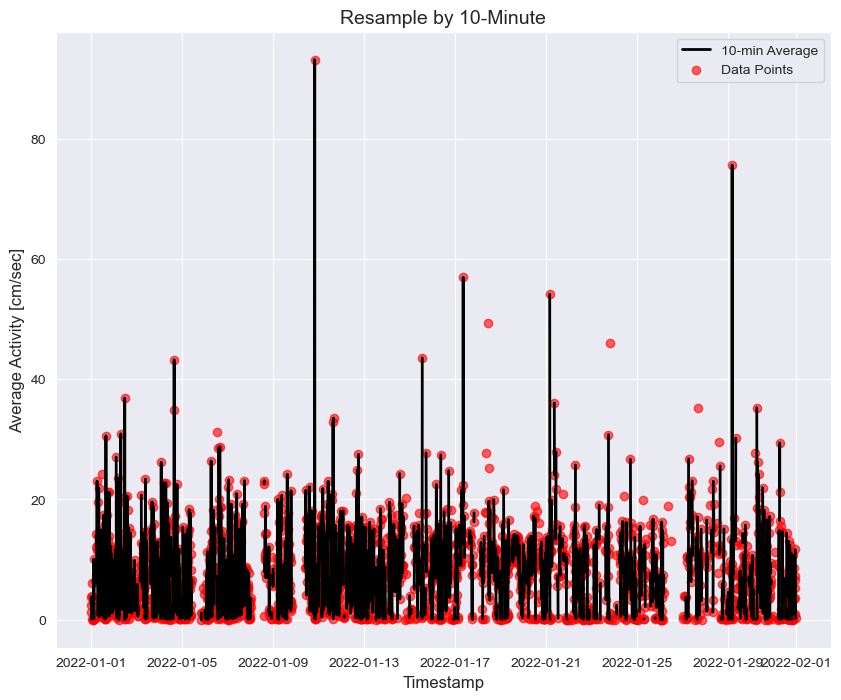

In [66]:
pit.plot(result.index, result["mean"], color="black", linestyle="-", linewidth=2, label="10-min Average")

pit.scatter(result.index, result["mean"], color="red", alpha=0.6, label="Data Points")
pit.title("Resample by 10-Minute", fontsize=14)
pit.xlabel("Timestamp", fontsize=12)
pit.ylabel("Average Activity [cm/sec]", fontsize=12)
pit.legend()
pit.grid(True)

pit.show()

In [67]:
oneHour = cleaned2.resample('1H')
result = oneHour['calc_act'].agg(['mean','min','max'])
result

C:\Users\302-15\AppData\Local\Temp\ipykernel_15544\954552443.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  oneHour = cleaned2.resample('1H')


,mean,min,max
timestamp,,,
2022-01-01 00:00:00,3.025915,0.011198,14.338601
2022-01-01 01:00:00,3.948859,0.013024,7.813303
2022-01-01 02:00:00,1.965045,0.006504,9.646105
2022-01-01 03:00:00,9.173303,0.065512,67.447458
2022-01-01 04:00:00,6.503876,0.000000,28.781980
...,...,...,...
2022-01-31 19:00:00,3.453507,0.014785,39.131190
2022-01-31 20:00:00,0.052261,0.005667,0.112500
2022-01-31 21:00:00,8.707639,0.076334,43.773557


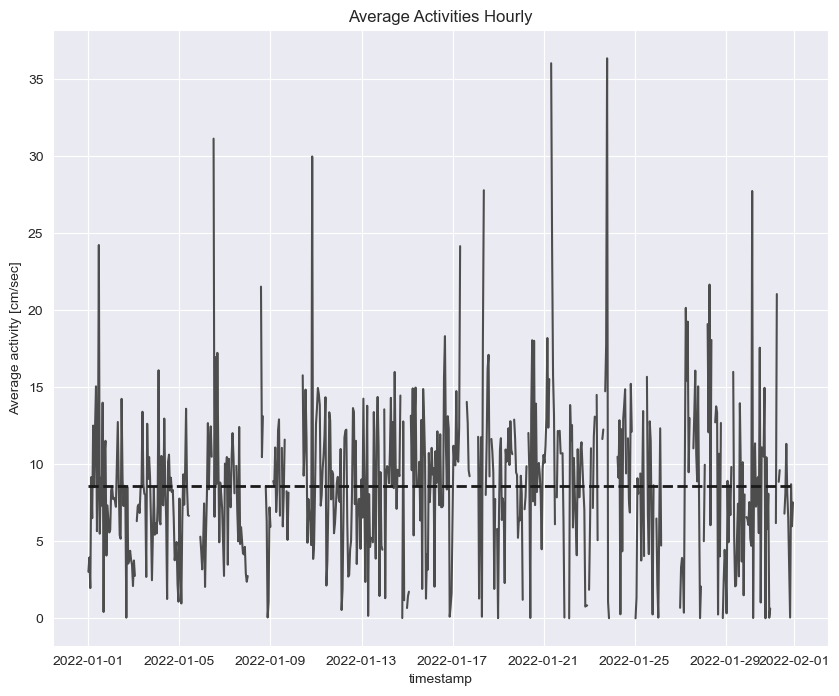

In [68]:
pit.plot(result['mean'], color='0.3')

pit.hlines(result['mean'].mean(), min(result.index),max(result.index), color='0.1' , linestyles='--', linewidth=2)

pit.title('Average Activities Hourly')
pit.xlabel('timestamp')
pit.ylabel('Average activity [cm/sec]')

pit.show()

In [69]:
oneDay = cleaned2.resample('D')
result = oneDay['calc_act'].agg(['mean', 'min', 'max'])
result

,mean,min,max
timestamp,,,
2022-01-01,8.801942,0.000000,180.000000
2022-01-02,6.869050,0.000000,196.279481
2022-01-03,7.388244,0.000000,458.448986
2022-01-04,8.304327,0.000000,221.561886
2022-01-05,7.711977,0.005796,110.315326
2022-01-06,10.305163,0.000000,206.091424
2022-01-07,6.816522,0.000000,179.109595
2022-01-08,9.871009,0.000000,116.407418
2022-01-09,8.701704,0.000000,135.110723


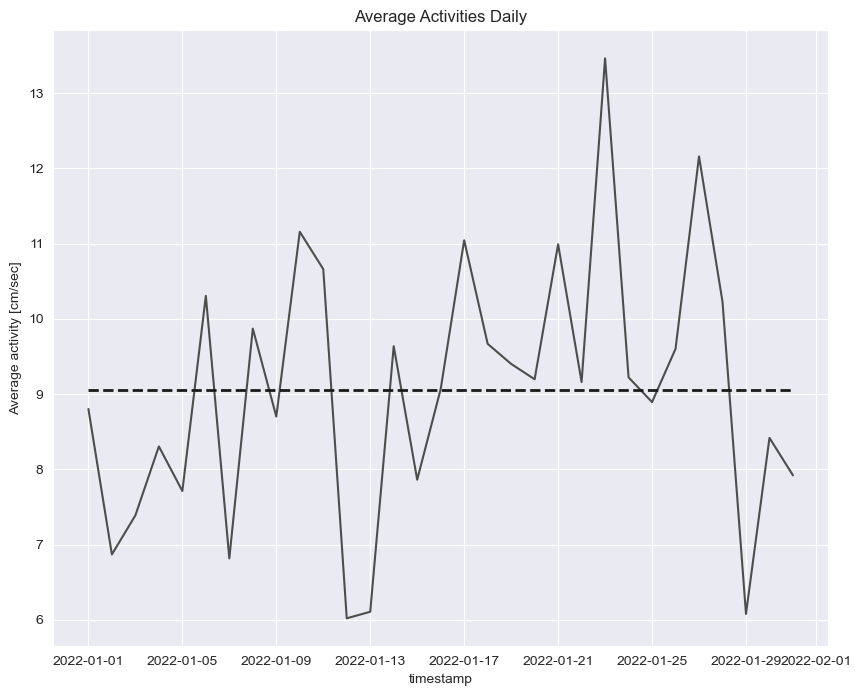

In [70]:
pit.plot( result['mean'], color='0.3')

# 속도(활동) 평균선
pit.hlines(result['mean'].mean(),  min(result.index), max(result.index),  color='0.1', linestyle='--', linewidth=2)

pit.title("Average Activities Daily")
pit.xlabel("timestamp")
pit.ylabel("Average activity [cm/sec]")

pit.show()

In [71]:
act['timestamp'] = pd.to_datetime(act['timestamp'])

act['calc_act'] = np.sqrt(act['X']**2 + act['Y']**2 + act['Z']**2)

max_activity_row = act.loc[act['calc_act'].idxmax()]

min_activity_row = act.loc[act['calc_act'].idxmin()]

max_activity_row[['timestamp', 'calc_act']], min_activity_row[['timestamp', 'calc_act']]

(timestamp    2022-01-09 00:03:42.083000
 calc_act                     621.515084
 Name: 14959, dtype: object,
 timestamp    2022-01-12 19:43:12.323000
 calc_act                      38.340579
 Name: 25379, dtype: object)

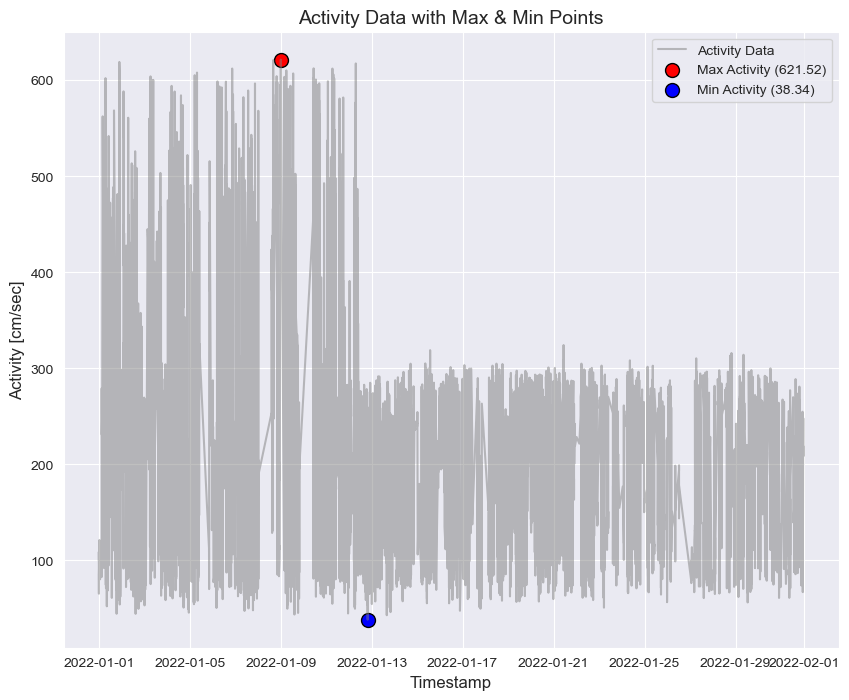

In [72]:
pit.plot(act['timestamp'], act['calc_act'], color="gray", alpha=0.5, label="Activity Data")

pit.scatter(max_activity_row['timestamp'], max_activity_row['calc_act'], 
            color="red", label=f"Max Activity ({max_activity_row['calc_act']:.2f})", s=100, edgecolors='black')

pit.scatter(min_activity_row['timestamp'], min_activity_row['calc_act'], 
            color="blue", label=f"Min Activity ({min_activity_row['calc_act']:.2f})", s=100, edgecolors='black')

pit.title("Activity Data with Max & Min Points", fontsize=14)
pit.xlabel("Timestamp", fontsize=12)
pit.ylabel("Activity [cm/sec]", fontsize=12)
pit.legend()
pit.grid(True)

pit.show()

In [73]:

# ✅ IQR(사분위 범위) 계산
Q1 = act['calc_act'].quantile(0.25)
Q3 = act['calc_act'].quantile(0.75)
IQR = Q3 - Q1

# ✅ 이상치 기준 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ✅ 이상치 데이터 필터링
outliers = act[(act['calc_act'] < lower_bound) | (act['calc_act'] > upper_bound)]

# ✅ 이상치 개수 확인
num_outliers = outliers.shape[0]
num_outliers

5347

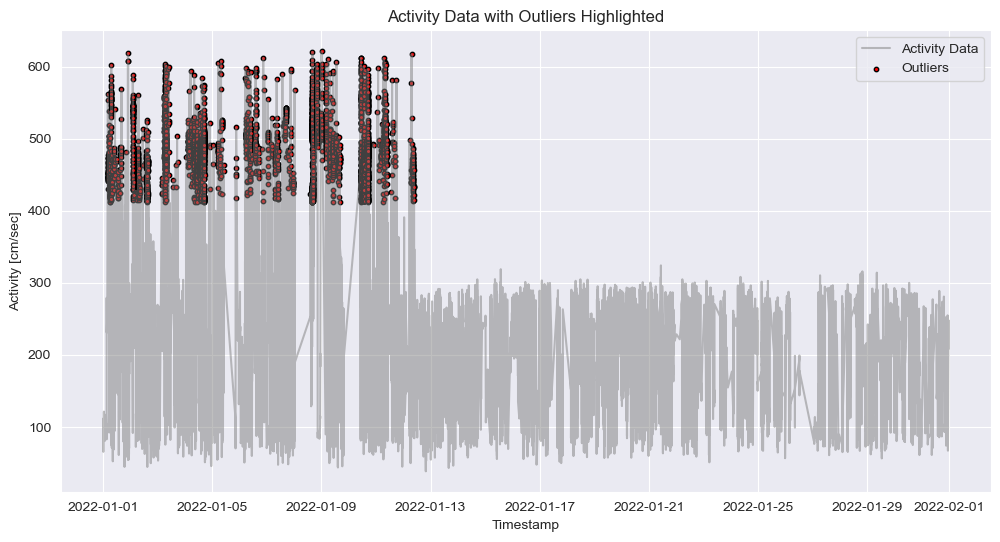

In [74]:
# ✅ 이상치 그래프 시각화
pit.figure(figsize=(12, 6))

# 전체 활동량 그래프 (회색 선)
pit.plot(act['timestamp'], act['calc_act'], color="gray", alpha=0.5, label="Activity Data")

# 이상치 데이터 (빨간 점)
pit.scatter(outliers['timestamp'], outliers['calc_act'], color="red", label="Outliers", s=10, edgecolors='black')

# 그래프 제목 및 축 설정
pit.title("Activity Data with Outliers Highlighted")
pit.xlabel("Timestamp")
pit.ylabel("Activity [cm/sec]")
pit.legend()
pit.grid(True)

# 그래프 표시
pit.show()


In [75]:
# ✅ 이상치 데이터에도 요일 & 시간대 정보 추가
outliers['weekday'] = outliers['timestamp'].dt.day_name()
outliers['hour'] = outliers['timestamp'].dt.hour

# ✅ 요일별 이상치 개수 분석
weekday_outliers = outliers['weekday'].value_counts().sort_index()

# ✅ 시간대별 이상치 개수 분석
hourly_outliers = outliers['hour'].value_counts().sort_index()

# ✅ 결과 확인
weekday_outliers, hourly_outliers


C:\Users\302-15\AppData\Local\Temp\ipykernel_15544\4147409427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['weekday'] = outliers['timestamp'].dt.day_name()
C:\Users\302-15\AppData\Local\Temp\ipykernel_15544\4147409427.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['hour'] = outliers['timestamp'].dt.hour


(weekday
 Friday        184
 Monday       1341
 Saturday     1188
 Sunday        754
 Thursday      224
 Tuesday      1521
 Wednesday     135
 Name: count, dtype: int64,
 hour
 0     131
 1       2
 2      98
 3     116
 4     124
 5     124
 6     476
 7     735
 8     190
 9     153
 10    554
 11     22
 12    137
 13    567
 14    381
 15    495
 16    650
 17     33
 18      8
 19    122
 20    168
 21      9
 22      4
 23     48
 Name: count, dtype: int64)

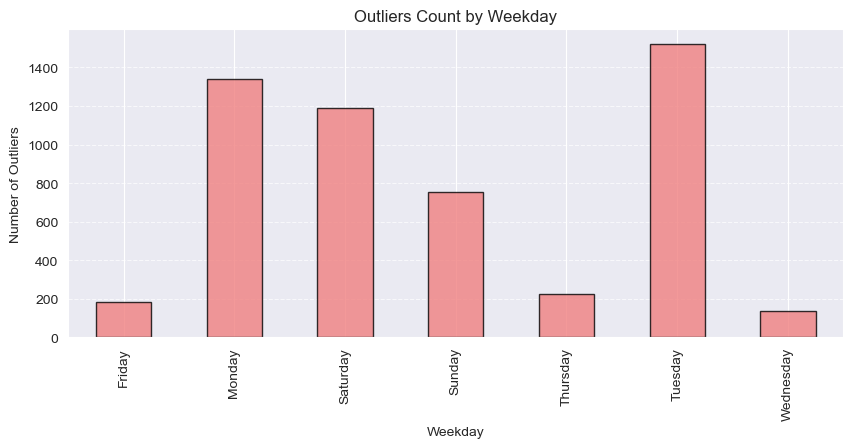

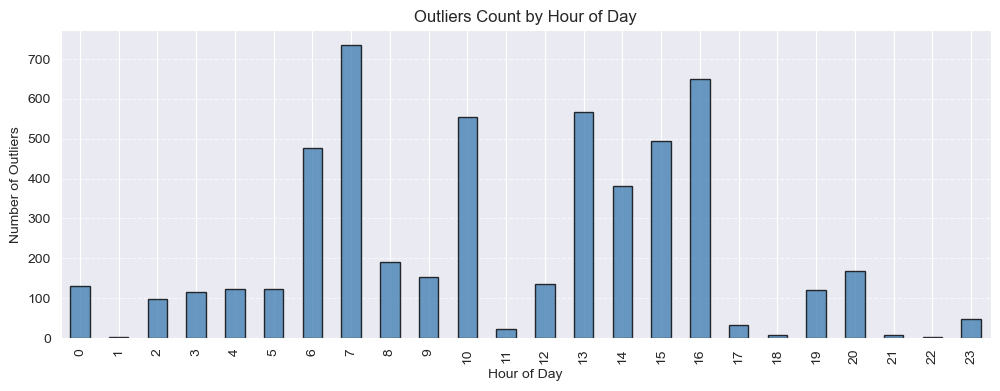

In [77]:
# ✅ 요일별 이상치 개수 그래프
pit.figure(figsize=(10, 4))
weekday_outliers.plot(kind='bar', color='lightcoral', alpha=0.8, edgecolor='black')
pit.title("Outliers Count by Weekday")
pit.xlabel("Weekday")
pit.ylabel("Number of Outliers")
pit.grid(axis='y', linestyle='--', alpha=0.7)
pit.show()

# ✅ 시간대별 이상치 개수 그래프
pit.figure(figsize=(12, 4))
hourly_outliers.plot(kind='bar', color='steelblue', alpha=0.8, edgecolor='black')
pit.title("Outliers Count by Hour of Day")
pit.xlabel("Hour of Day")
pit.ylabel("Number of Outliers")
pit.xticks(range(24))
pit.grid(axis='y', linestyle='--', alpha=0.7)
pit.show()


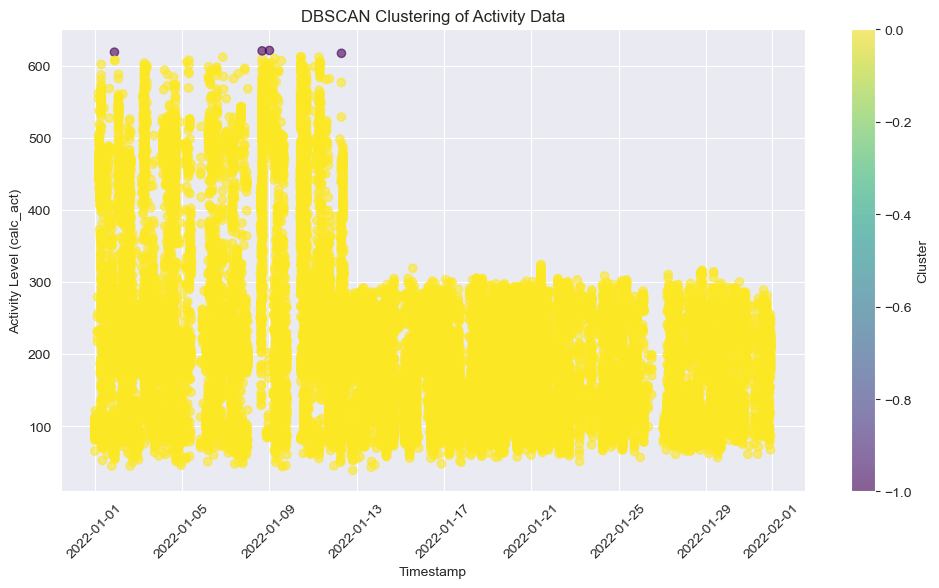

In [84]:


# ✅ timestamp를 datetime 형식으로 변환 (있다면)
if 'timestamp' in act.columns:
    act['timestamp'] = pd.to_datetime(act['timestamp'])

# ✅ 활동량(activity) 계산 (벡터 크기) (X, Y, Z 컬럼이 있는지 확인)
if {'X', 'Y', 'Z'}.issubset(act.columns):
    act['calc_act'] = np.sqrt(act['X']**2 + act['Y']**2 + act['Z']**2)
else:
    raise ValueError("데이터에 X, Y, Z 컬럼이 없습니다.")

# ✅ DBSCAN 클러스터링 적용
dbscan = DBSCAN(eps=5, min_samples=10)  # eps(반경), min_samples(최소 포인트 개수)
act['cluster'] = dbscan.fit_predict(act[['calc_act']])

# ✅ 클러스터링 결과 시각화
pit.figure(figsize=(12, 6))
pit.scatter(act['timestamp'], act['calc_act'], c=act['cluster'], cmap='viridis', alpha=0.6)
pit.colorbar(label='Cluster')
pit.xlabel('Timestamp')
pit.ylabel('Activity Level (calc_act)')
pit.title('DBSCAN Clustering of Activity Data')
pit.xticks(rotation=45)
pit.show()